### Time to get your hands dirty! Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks

- In the above example, experiment with chopping off different numbers of initial points as burn-in.


#### More

- Redo the same for the Markovian process describing the stock market (see above in this notebook). If you've written your code well, this should require minor modifications.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import astroML.stats

### 1. Cloud or Sunny

Conditional probabilities

In [2]:
#ref{nomenclatura by Bea}
psc = 0.5
pcc = 0.5
pcs = 0.1
pss = 0.9

Markov Chain implementation: for 10000 steps, I extract a case between cloud or sunny and I accept it or refuse it with respect to the conditional probabilities.

In [3]:
current = 0 #where 0 represent cloudy
trace = []
trace.append(current)
for _ in range(10000):
    previous = current
    proposal = random.randint(0,1)
    x = random.uniform(0,1)
    if (previous == 0) and (proposal == 0):
        if x < pcc:
            current = proposal
    if (previous == 0) and (proposal == 1):
        if x < psc:
            current = proposal
    if (previous == 1) and (proposal == 0):
        if x < pcs:
            current = proposal
    if (previous == 1) and (proposal == 1):
        if x < pss:
            current = proposal
    trace.append(current)

Plotting the trace obtained from the Markov Chain

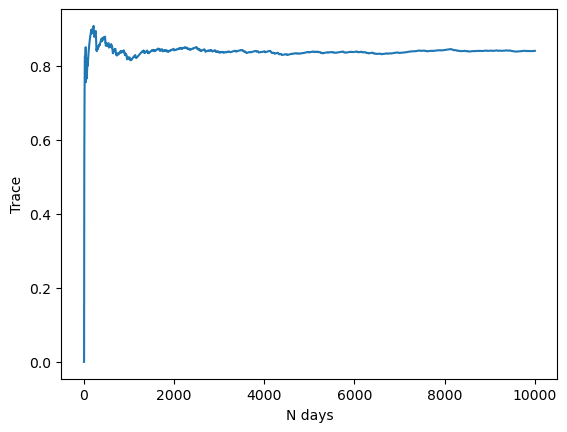

In [4]:
trace = np.array(trace)
cumulative = np.cumsum(trace)/(np.arange(trace.shape[0])+1)
plt.plot(cumulative)
plt.xlabel('N days')
plt.ylabel('Trace')
plt.show()

Computing the sunny (cloud) probability

In [5]:
prob_sun = sum(trace)/len(trace)
prob_clouds = 1-prob_sun
print(prob_sun, prob_clouds)

0.8401159884011599 0.15988401159884014


Plotting histogram of trace: as we can see, the first steps are not stationary, therefore, is necessary to exclude them

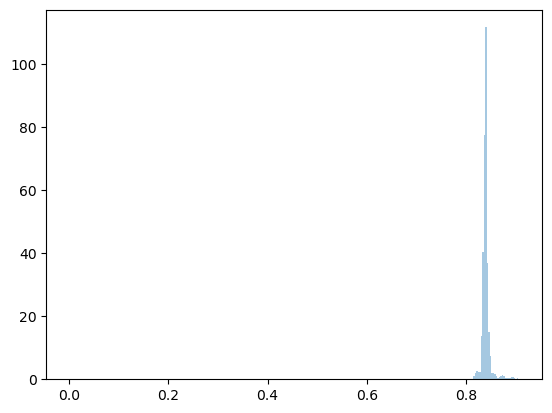

In [6]:
plt.hist(cumulative, bins=300, density = True, alpha=0.4);

In [7]:
print(np.median(cumulative))
print(astroML.stats.sigmaG(cumulative))
print(min(cumulative),max(cumulative))

0.8386996260905691
0.0037493368452636237
0.0 0.9074074074074074


Computing same histogram without first non stationary steps

0.8387765681700363
0.0033665467354329617
0.8286625655046708 0.850501002004008


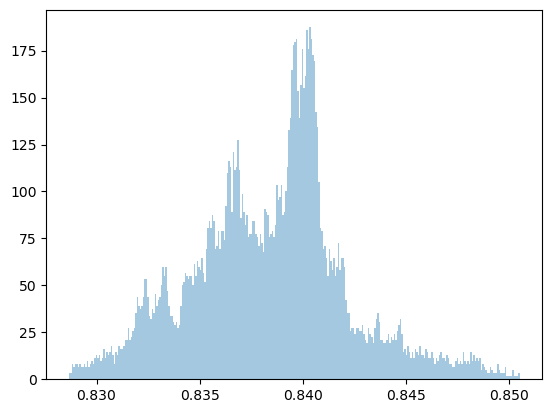

In [8]:
burnin_index=1500
running_burn = cumulative[burnin_index:]


plt.hist(running_burn, bins=300, density=True, alpha=0.4);
print(np.median(running_burn))
print(astroML.stats.sigmaG(running_burn))
print(min(running_burn),max(running_burn))

### 2. Stock Market

Conditional probabilities for the stock market

In [9]:
pblbl = 0.9
pblbr = 0.075
pblsm = 0.025

pbrbr = 0.8
pbrbl = 0.15
pbrsm = 0.05

psmsm = 0.5
psmbl = 0.25
psmbr = 0.25

Markov Chain Implementation

current = 0 #where 0 represent Bull Market, 1 represent Bear Market and 2 represent Stagnant Market
trace = []
trace.append(current)
for _ in range(1000000):
    previous = current
    proposal = random.randint(0,2)
    x = random.uniform(0,2)
    if (previous == 0) and (proposal == 0):
        if x < pblbl:
            current = proposal
    if (previous == 0) and (proposal == 1):
        if x < pblbr:
            current = proposal
    if (previous == 0) and (proposal == 2):
        if x < pblsm:
            current = proposal
    if (previous == 1) and (proposal == 0):
        if x < pbrbl:
            current = proposal
    if (previous == 1) and (proposal == 1):
        if x < pbrbr:
            current = proposal
    if (previous == 1) and (proposal == 2):
        if x < pbrsm:
            current = proposal
    if (previous == 2) and (proposal == 0):
        if x < psmbl:
            current = proposal
    if (previous == 2) and (proposal == 1):
        if x < psmbr:
            current = proposal
    if (previous == 2) and (proposal == 2):
        if x < psmsm:
            current = proposal
    trace.append(current)

plotting the trace

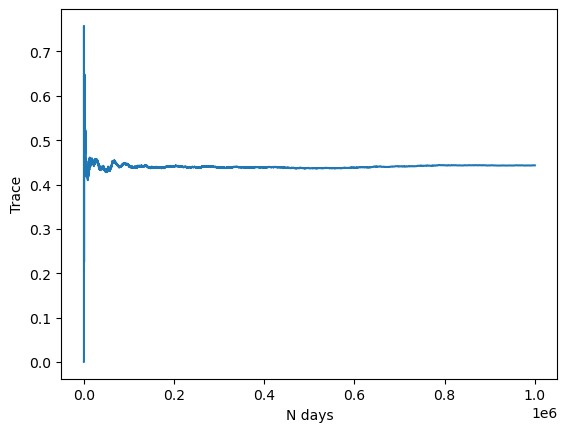

In [11]:
trace = np.array(trace)
cumulative = np.cumsum(trace)/(np.arange(trace.shape[0])+1)
plt.plot(cumulative)
plt.xlabel('N days')
plt.ylabel('Trace')
plt.show()

In [12]:
print(np.median(cumulative))
print(astroML.stats.sigmaG(cumulative))
print(min(cumulative),max(cumulative))

0.43990369526815576
0.0033357134795377465
0.0 0.7575757575757576


Plotting histogram avoiding the first not stationary steps

0.4397446177587485
0.0031873327009666716
0.4362177920570001 0.4439475990952763


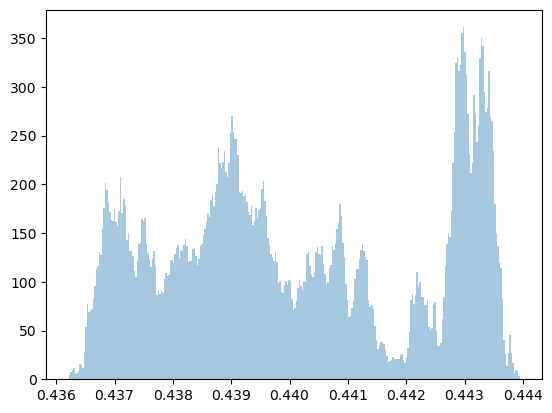

In [13]:
burnin_index=100000
running_burn = cumulative[burnin_index:]


plt.hist(running_burn, bins=300, density=True, alpha=0.4);
print(np.median(running_burn))
print(astroML.stats.sigmaG(running_burn))
print(min(running_burn),max(running_burn))

Computing bull market, bear market and stagnant market probabilities.

In [18]:
prob_bull = trace[trace == 0].shape[0]/len(trace)
prob_bear = trace[trace == 1].shape[0]/len(trace)
prob_stagnant = 1-prob_bull - prob_bear
print(prob_bull, prob_bear, prob_stagnant)

0.6204463795536205 0.3157746842253158 0.06377893622106373
